<a href="https://colab.research.google.com/github/RSNROXX/Analysis-of-Indian-and-US-Stocks-Using-ML-Models/blob/main/DecisionTree_NIFTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

stock_data = yf.download('^NSEI', start='2015-01-01', end='2018-12-31')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800


In [ ]:
df = yf.download('^NSEI', start='2015-01-01', end='2018-12-31')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800
...,...,...,...,...,...,...
2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500
2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400
2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500
2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400
2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700
2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100
2018-12-28,10820.950195,10893.599609,10817.150391,10859.900391,10859.900391,245500


In [ ]:
df.shape

(980, 6)

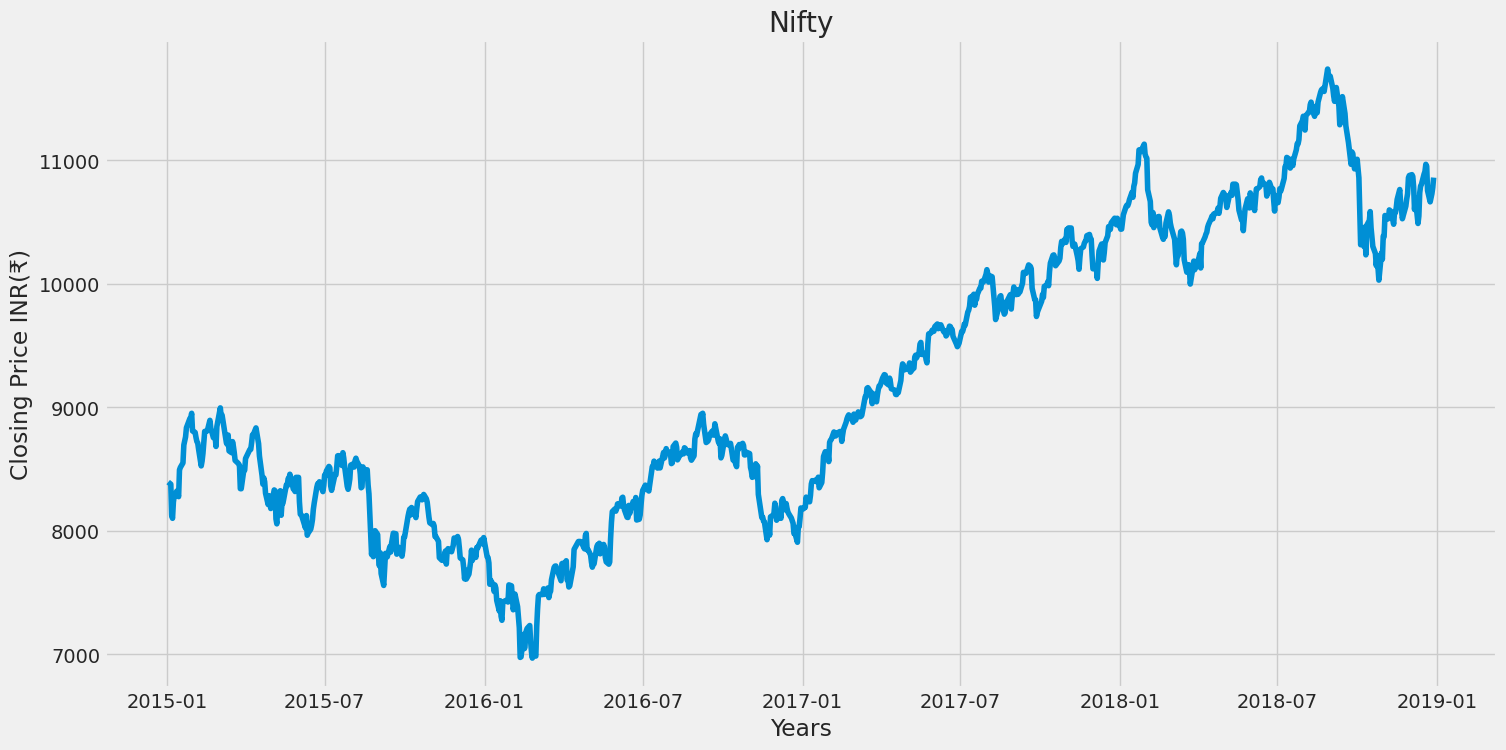

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nifty')
plt.xlabel('Years')
plt.ylabel('Closing Price INR(₹)')
plt.plot(df['Close'])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/NiftyNSEI.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0
1,2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0
2,2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800.0
3,2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100.0
4,2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1229 non-null   object 
 1   Open       1222 non-null   float64
 2   High       1222 non-null   float64
 3   Low        1222 non-null   float64
 4   Close      1222 non-null   float64
 5   Adj Close  1222 non-null   float64
 6   Volume     1222 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1.222000e+03
mean,9635.085400,9675.189371,9577.014233,9626.113180,9626.113180,2.579998e+05
std,1398.287237,1400.736791,1392.818351,1396.910341,1396.910341,1.593962e+05
min,7023.649902,7034.200195,6825.799805,6970.600098,6970.600098,0.000000e+00
25%,8376.837402,8413.225097,8322.437500,8361.512451,8361.512451,1.634250e+05
50%,9660.550293,9685.725097,9638.700195,9660.725098,9660.725098,2.035000e+05
75%,10814.675293,10855.049805,10750.937744,10802.075195,10802.075195,2.958000e+05
max,12274.900391,12293.900391,12252.750000,12271.799805,12271.799805,1.414800e+06


In [ ]:
df.shape

(1229, 7)

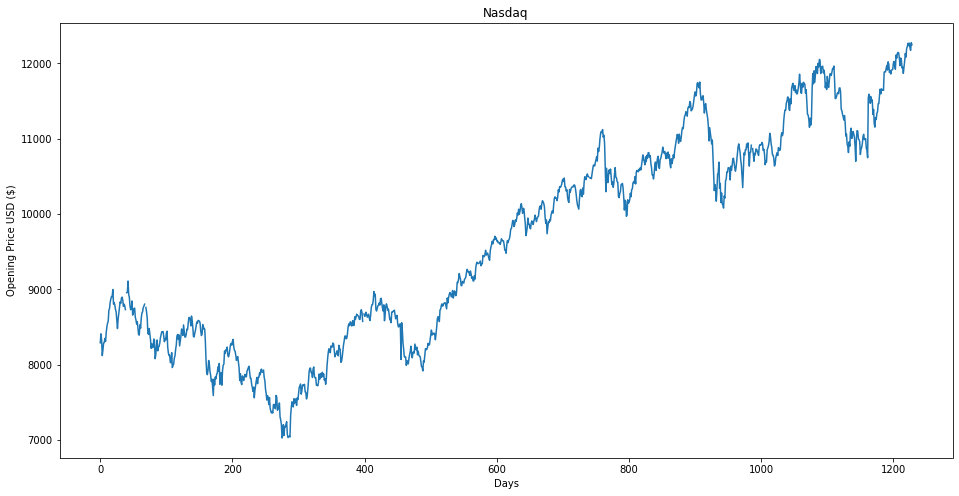

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nifty')
plt.xlabel('Days')
plt.ylabel('Opening Price Rupees')
plt.plot(df['Open'])
plt.show()

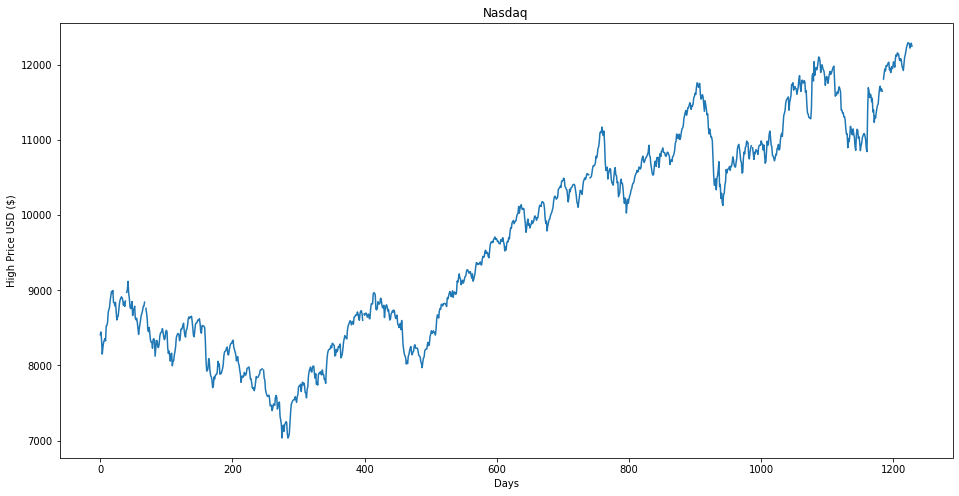

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nasdaq')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['High'])
plt.show()

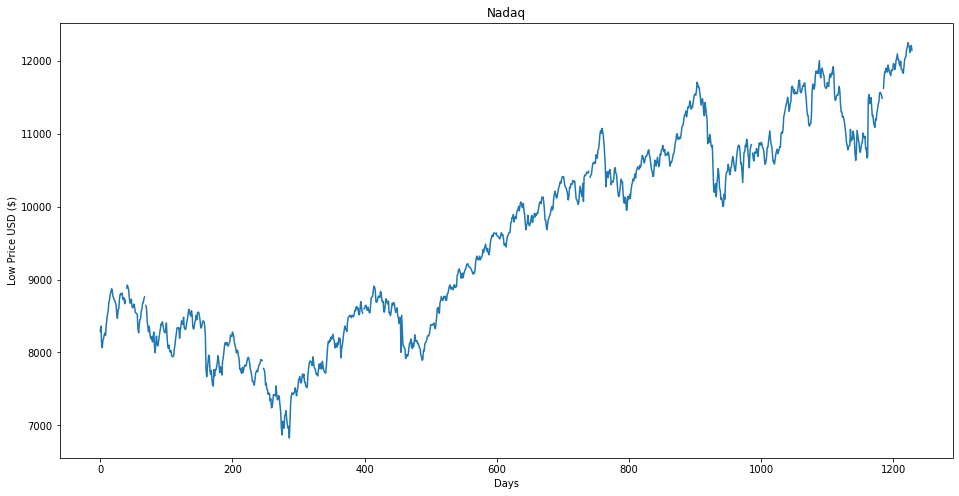

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nadaq')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['Low'])
plt.show()

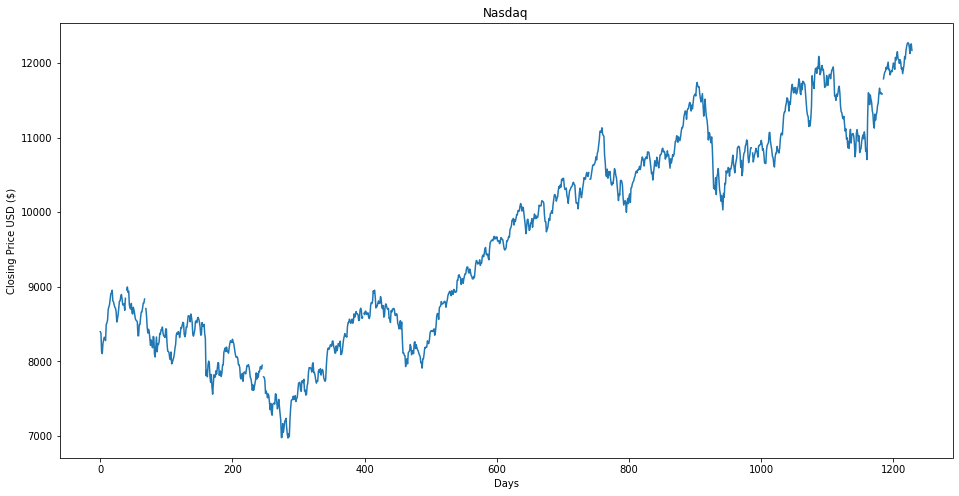

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Nifty')
plt.xlabel('Days')
plt.ylabel('Closing Price Rupees')
plt.plot(df['Close'])
plt.show()

In [ ]:
df2 = df['Close']

In [ ]:
df2.tail()

1224    12214.549805
1225    12126.549805
1226    12245.799805
1227    12255.849609
1228    12168.450195
Name: Close, dtype: float64

In [ ]:
df2 = pd.DataFrame(df2)

In [ ]:
df2.tail()

,Close
1224,12214.549805
1225,12126.549805
1226,12245.799805
1227,12255.849609
1228,12168.450195


In [ ]:
future_days = 14
df2['Prediction'] = df2['Close'].shift(-future_days)

In [ ]:
df2.tail()

,Close,Prediction
1224,12214.549805,NaN
1225,12126.549805,NaN
1226,12245.799805,NaN
1227,12255.849609,NaN
1228,12168.450195,NaN


In [ ]:

print(X)

[[ 8395.450195]
 [ 8378.400391]
 [ 8127.350098]
 ...
 [11921.5     ]
 [11937.5     ]
 [11856.799805]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 8761.400391  8835.599609  8910.5      ... 12245.799805 12255.849609
 12168.450195]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


ValueError: ignored

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[8526.730469],
       [8506.209961],
       [8519.879883],
       [8632.490234],
       [8647.929688],
       [8705.179688],
       [8665.469727],
       [8567.990234],
       [8520.639648],
       [8566.669922],
       [8570.700195],
       [8656.530273],
       [8621.830078],
       [8616.179688]])

In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[8654.049805 8717.320313 8734.879883 8814.230469 8823.360352 8827.740234
 8887.219727 8924.959961 8945.650391 8924.959961 9022.389648 9006.620117
 8945.990234 8972.599609]


In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[8578.12304937 8557.63728952 8571.28406372 8683.70372736 8699.11703715
 8756.27009356 8716.62737494 8619.31294765 8572.04254219 8617.99487138
 8622.01831977 8707.70305845 8673.0616226  8667.42080062]


In [ ]:
predictions = tree_prediction
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


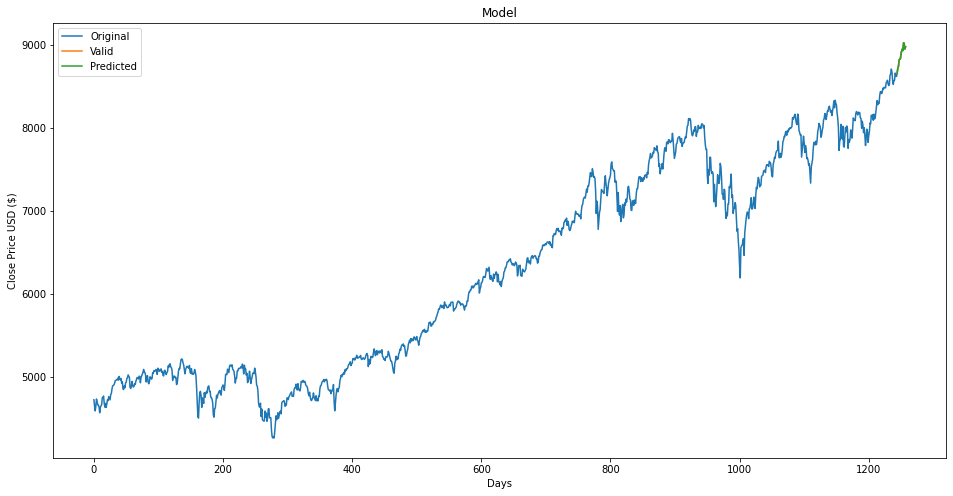

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()